### **Install Library**

In [203]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm
import copy
import seaborn as sns


In [204]:
num_seeds = 30
seed = 0
# Load fullstate
data_fullstate = np.empty(num_seeds, dtype=object)
data_no_joint_pos = np.empty(num_seeds, dtype=object)
data_no_joint_vel = np.empty(num_seeds, dtype=object)
data_no_action = np.empty(num_seeds, dtype=object)
data_no_imu = np.empty(num_seeds, dtype=object)
data_no_fc = np.empty(num_seeds, dtype=object)
for i in range(num_seeds):
    data_fullstate[i] = np.load(f"data/HEBB-FULL-STATE_seed-{seed}-fullstate-rand-{i}.npz")    
    data_no_joint_pos[i] = np.load(f"data/HEBB-FULL-STATE_seed-{seed}-no_joint_pos-rand-{i}.npz")
    data_no_joint_vel[i] = np.load(f"data/HEBB-FULL-STATE_seed-{seed}-no_joint_vel-rand-{i}.npz")
    data_no_action[i] = np.load(f"data/HEBB-FULL-STATE_seed-{seed}-no_action-rand-{i}.npz")
    data_no_imu[i] = np.load(f"data/HEBB-FULL-STATE_seed-{seed}-no_imu-rand-{i}.npz")
    data_no_fc[i] = np.load(f"data/HEBB-FULL-STATE_seed-{seed}-no_fc-rand-{i}.npz")

In [205]:
print(data_fullstate[1].keys())

KeysView(NpzFile 'data/HEBB-FULL-STATE_seed-0-fullstate-rand-1.npz' with keys: state, action, vel, action_lowpass, pos_x...)


In [206]:
data_fullstate[0]["pos_x"]

array([[-4.20025437e-08],
       [ 8.66926439e-06],
       [ 3.76825992e-05],
       [ 1.17980031e-04],
       [ 9.04735876e-04],
       [ 2.16434267e-03],
       [ 3.37792910e-03],
       [ 5.93702355e-03],
       [ 9.15944111e-03],
       [ 1.30723920e-02],
       [ 1.77155044e-02],
       [ 2.30159219e-02],
       [ 2.89135203e-02],
       [ 3.51284109e-02],
       [ 4.16198410e-02],
       [ 4.84851524e-02],
       [ 5.55490069e-02],
       [ 6.23547137e-02],
       [ 6.90856948e-02],
       [ 7.57107735e-02],
       [ 8.22093412e-02],
       [ 8.85287672e-02],
       [ 9.45640728e-02],
       [ 1.00283422e-01],
       [ 1.05647787e-01],
       [ 1.10667154e-01],
       [ 1.15290269e-01],
       [ 1.19457364e-01],
       [ 1.23256549e-01],
       [ 1.26635194e-01],
       [ 1.29441932e-01],
       [ 1.31611198e-01],
       [ 1.33302584e-01],
       [ 1.34629101e-01],
       [ 1.36005580e-01],
       [ 1.37975797e-01],
       [ 1.40431955e-01],
       [ 1.43451169e-01],
       [ 1.4

In [207]:
print(data_fullstate[0]["pos_x"].shape)
print(np.arange(len(data_fullstate[0]["pos_x"])).shape)

(1000, 1)
(1000,)


In [208]:
def plot_pos(data_set, key, runs=0):
    """Plot pos_x ของ run ตั้งแต่ 0 ถึง runs-1"""
    plt.figure(figsize=(10, 4))
    pos_x = data_set[runs][key]         # shape (1000, 1) หรือ (1000,)
    pos_x_flat = np.squeeze(pos_x)   # แปลงให้เหลือ (1000,)
    steps = np.arange(len(pos_x_flat))
    plt.plot(steps, pos_x_flat, label=f"Run {runs}")

    plt.xlabel("Step")
    plt.ylabel("pos_x (m/s)")
    plt.title("Position X over Time")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [209]:
def plot_pos_allrun(data_set, key, runs=0):
    """Plot pos_x ของ run ตั้งแต่ 0 ถึง runs-1 แบบเต็มหน้าจอ พร้อมปรับขนาด legend"""
    plt.figure(figsize=(12, 6))  # Full-screen-like size
    
    for i in range(runs):
        pos_x = data_set[i][key]         
        pos_x_flat = np.squeeze(pos_x)   
        steps = np.arange(len(pos_x_flat))
        plt.plot(steps, pos_x_flat, label=f"Run {i}")
    
    plt.xlabel("Step", fontsize=14)
    plt.ylabel(key, fontsize=14)
    plt.title(f"{key} over Time (All Runs)", fontsize=16)
    plt.legend(loc='upper left', fontsize=10, ncol=2, frameon=True)  # Smaller legend
    plt.grid(True)

    # Optional: tighten scale
    plt.xlim(0, steps[-1])
    ymin = min(np.min(np.squeeze(data_set[i][key])) for i in range(runs))
    ymax = max(np.max(np.squeeze(data_set[i][key])) for i in range(runs))
    plt.ylim(ymin - 0.05, ymax + 0.05)  # margin

    plt.tight_layout()
    plt.show()


In [210]:
def plot_posXY(data_set, pos_x , pos_y , runs=0):
    """Plot pos_x ของ run ตั้งแต่ 0 ถึง runs-1"""
    plt.figure(figsize=(10, 4))
    pos_x = np.squeeze(data_set[runs][pos_x])         # shape (1000, 1) หรือ (1000,)
    pos_y = np.squeeze(data_set[runs][pos_y])         # shape (1000, 1) หรือ (1000,)
    plt.plot(pos_x, pos_y, label=f"Run {runs}")

    plt.xlabel("pos_x (m)")
    plt.ylabel("pos_y (m)")
    plt.title("Position XY Trajectory")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [211]:
def plot_posXY_allrun(data_set, key_pos_x , key_pos_y):
    """Plot pos_x ของ run ตั้งแต่ 0 ถึง runs-1"""
    plt.figure(figsize=(16, 8))  # Full screen-like size
    runs = len(data_set)  # Use all runs if runs is 0
    for i in range(runs):
        pos_x = np.squeeze(data_set[i][key_pos_x])  # shape (T,)
        pos_y = np.squeeze(data_set[i][key_pos_y])  # shape (T,)
        plt.plot(pos_x, pos_y, label=f"Run {i}")

    plt.xlabel("pos_x (m)", fontsize=14)
    plt.ylabel("pos_y (m)", fontsize=14)
    plt.title("Position XY Trajectory", fontsize=16)
    plt.legend(loc='upper right', fontsize=10, ncol=2)
    plt.grid(True)
    plt.axis("equal")  # ✅ Maintain equal aspect ratio for XY
    plt.tight_layout()
    plt.show()

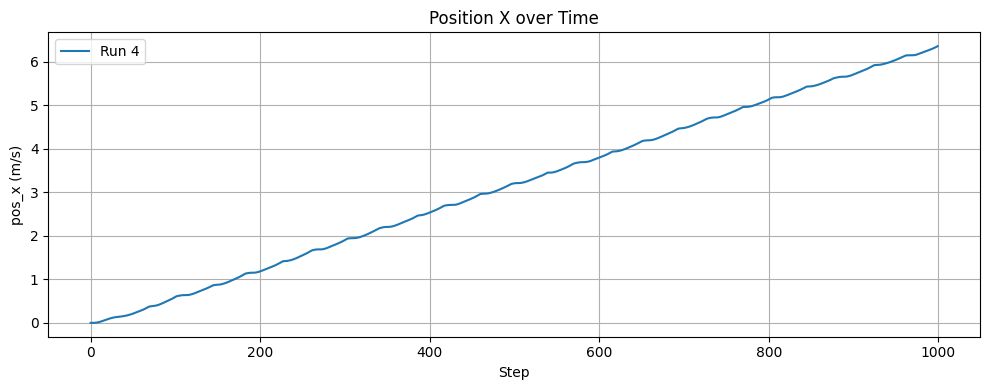

In [212]:
plot_pos(data_fullstate, "pos_x",runs=4)

In [213]:
pos_x_all = np.max([np.squeeze(run["pos_x"]) for run in data_fullstate] , axis=1)

In [214]:
def hist_max_pos_allrun(data_set, key):
    """Plot histogram of pos_x for a specific run"""
    plt.figure(figsize=(10, 4))
    runs = len(data_set)-1  # Use all runs if runs is 0
    pos_x = np.max([np.squeeze(run[key]) for run in data_set] , axis=1)  # shape (1000, 1) หรือ (1000,)
    # print(pos_x)
    plt.hist(pos_x, bins=30, alpha=0.7, color='blue', edgecolor='black')
    plt.xlabel("pos_x (m/s)")
    plt.ylabel("Frequency")
    plt.title(f"Histogram of {key} for Run {runs}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## **Plotting Performance**

### **Fullstate**

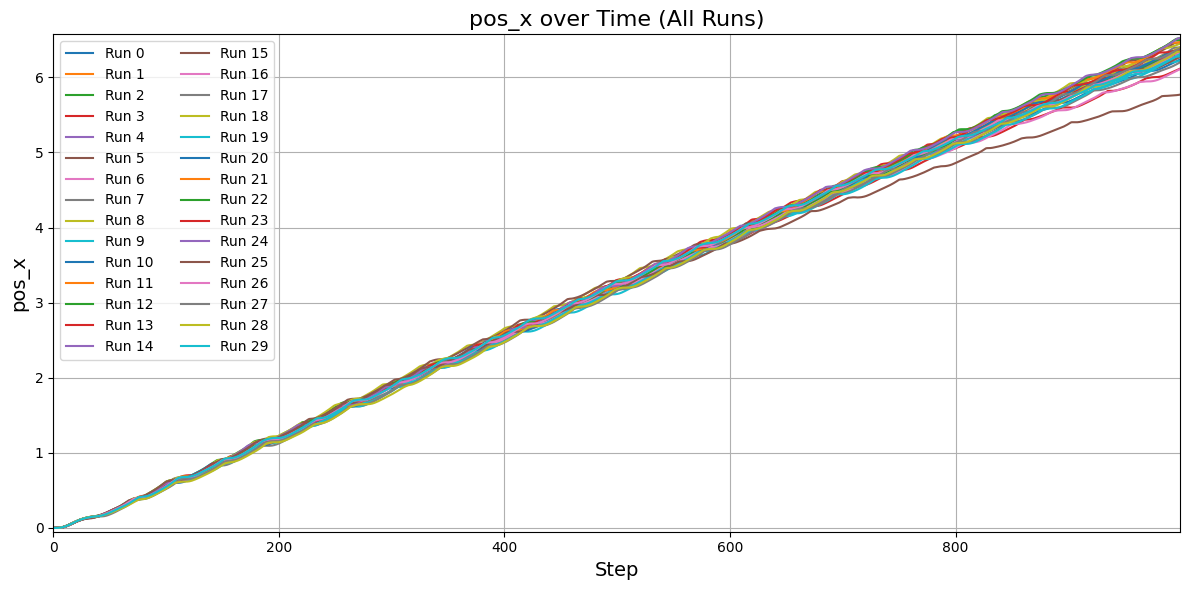

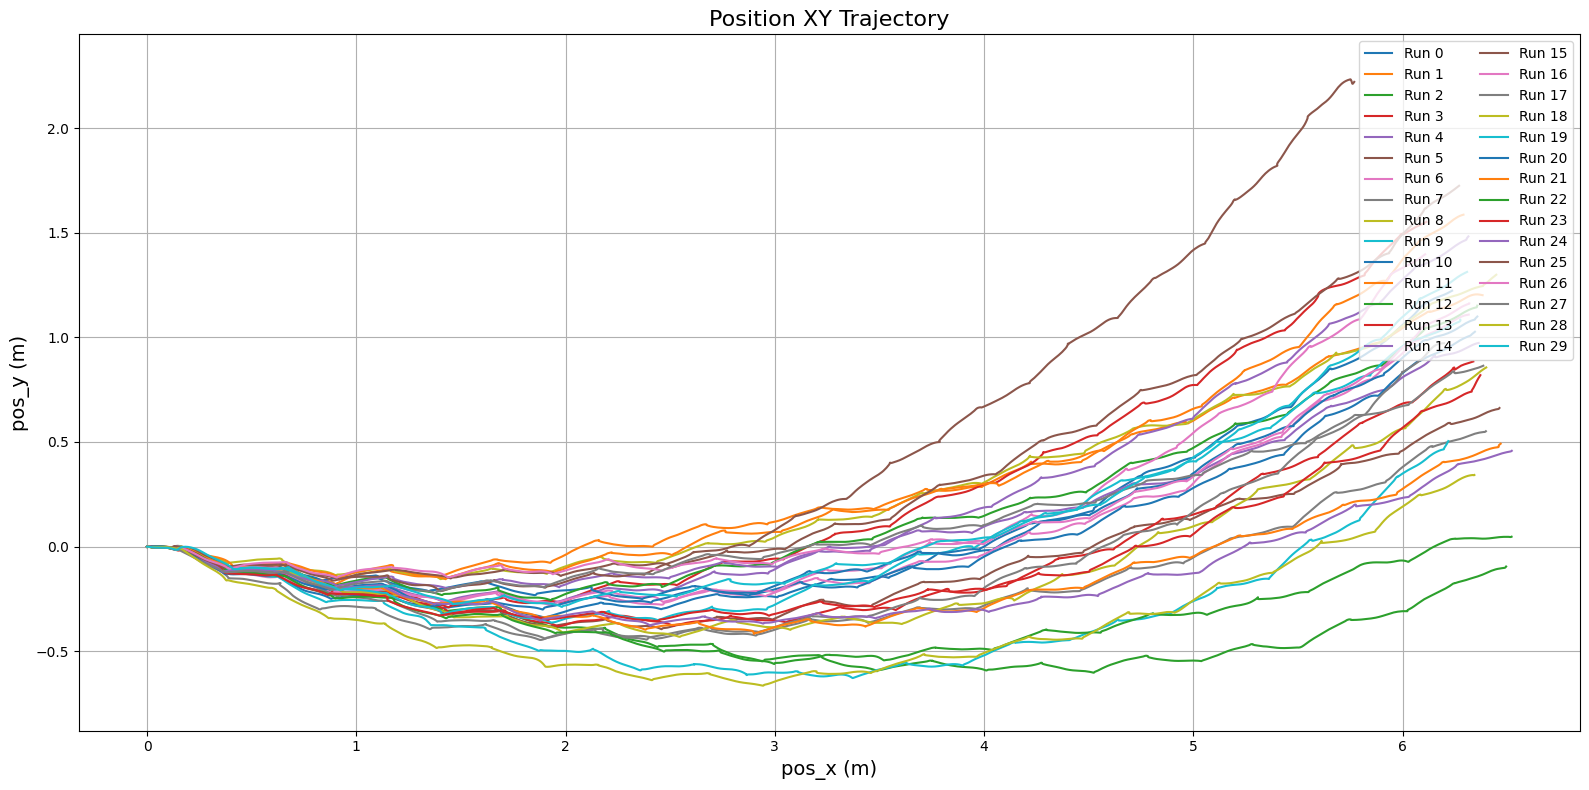

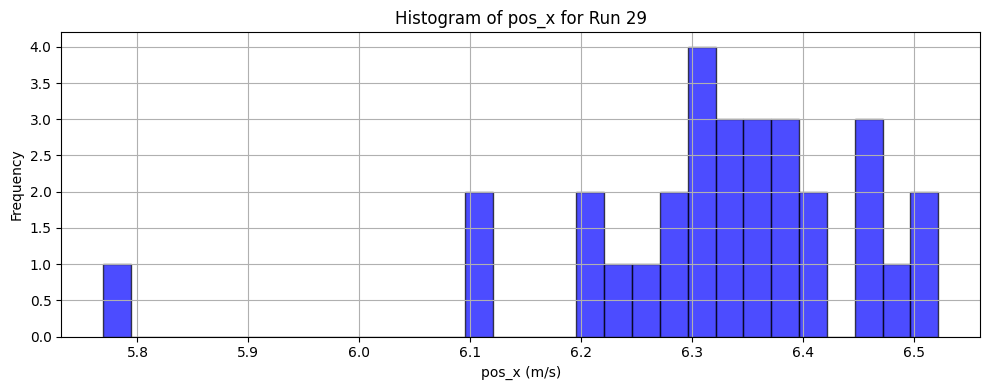

In [178]:
plot_pos_allrun(data_fullstate, "pos_x", runs=30)
plot_posXY_allrun(data_fullstate, "pos_x" ,"pos_y" )
hist_max_pos_allrun(data_fullstate, "pos_x")

### **No Joint pos**

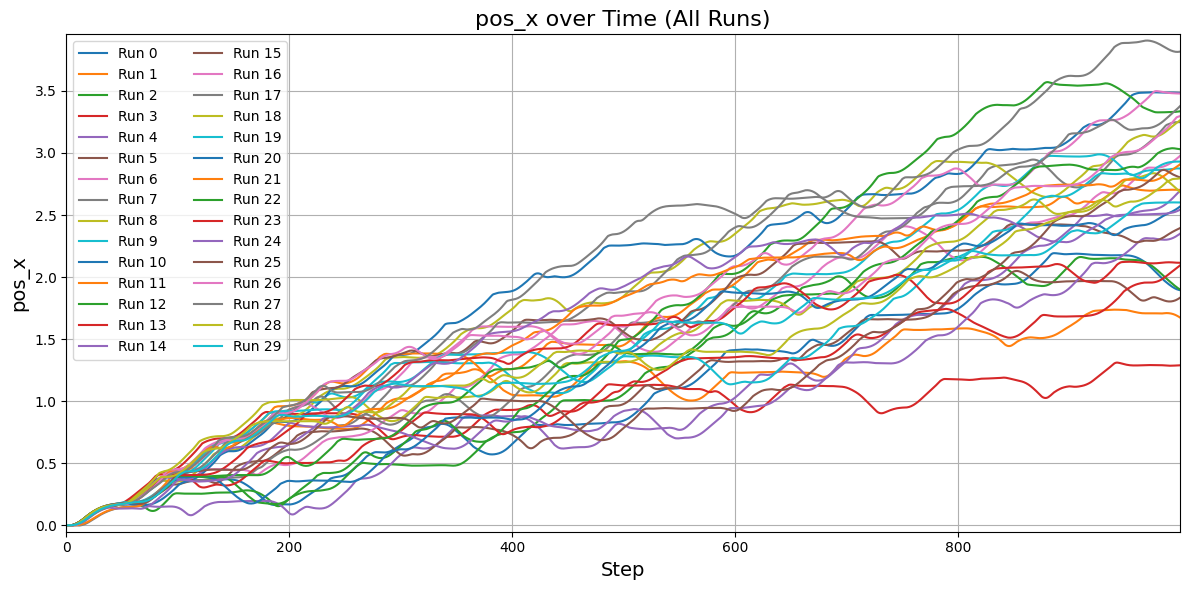

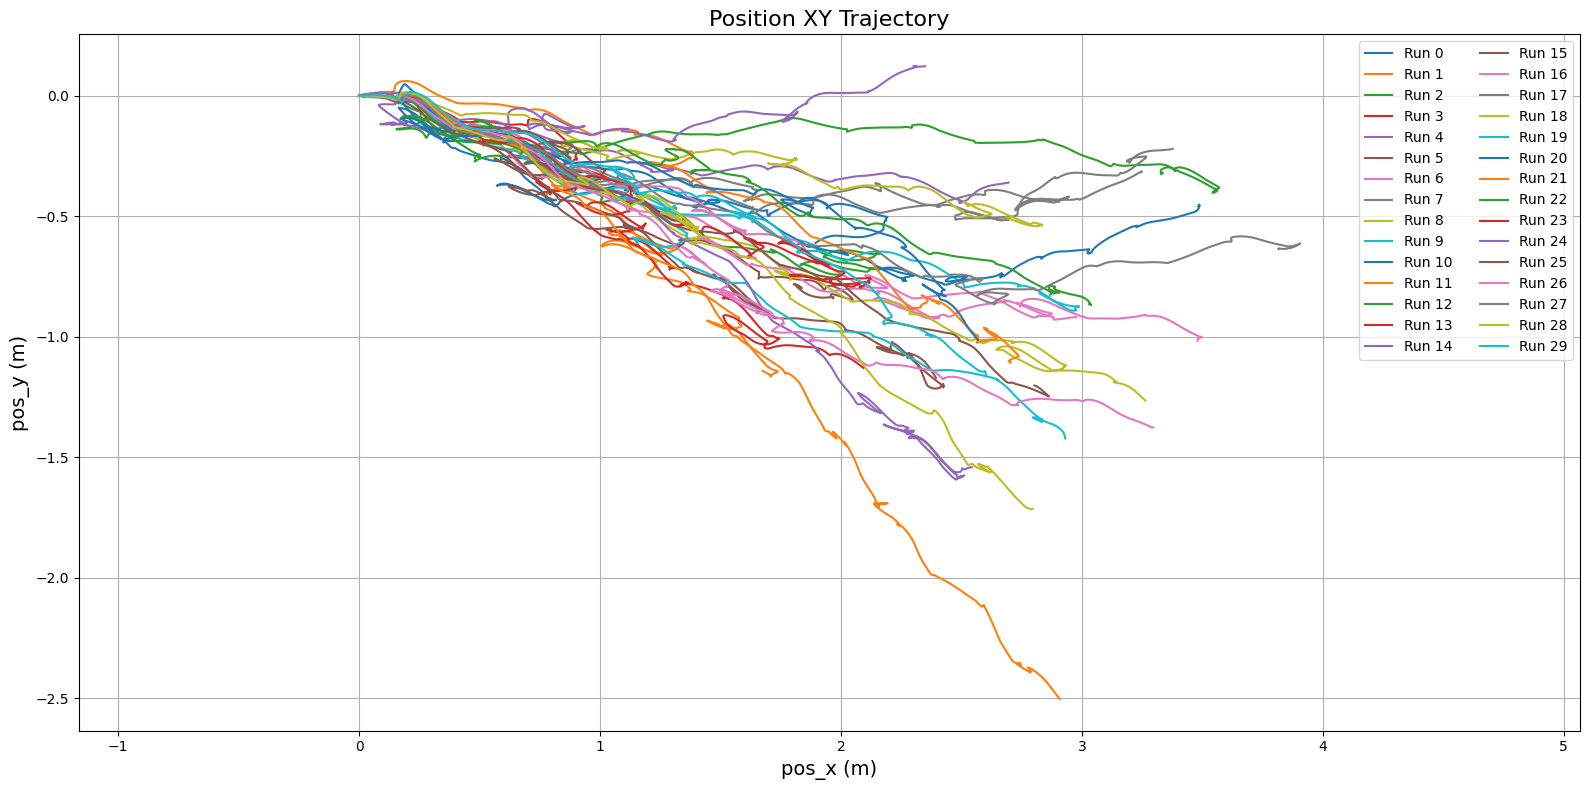

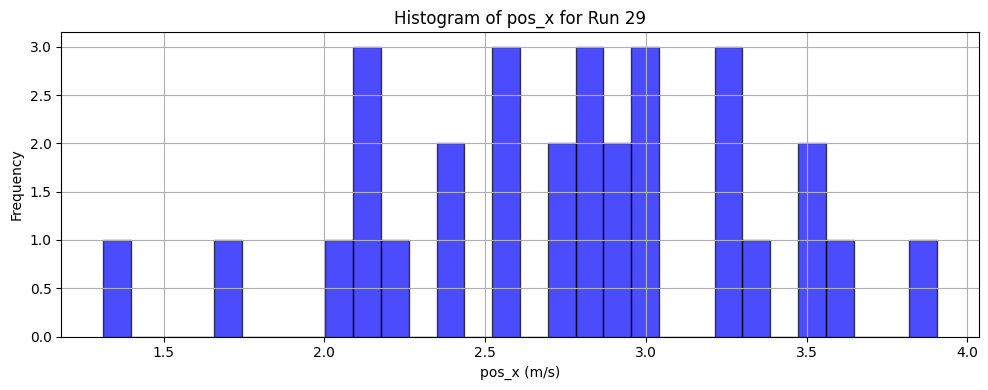

In [179]:
plot_pos_allrun(data_no_joint_pos, "pos_x", runs=30)
plot_posXY_allrun(data_no_joint_pos, "pos_x" ,"pos_y")
hist_max_pos_allrun(data_no_joint_pos, "pos_x")

### **No Joint vel**

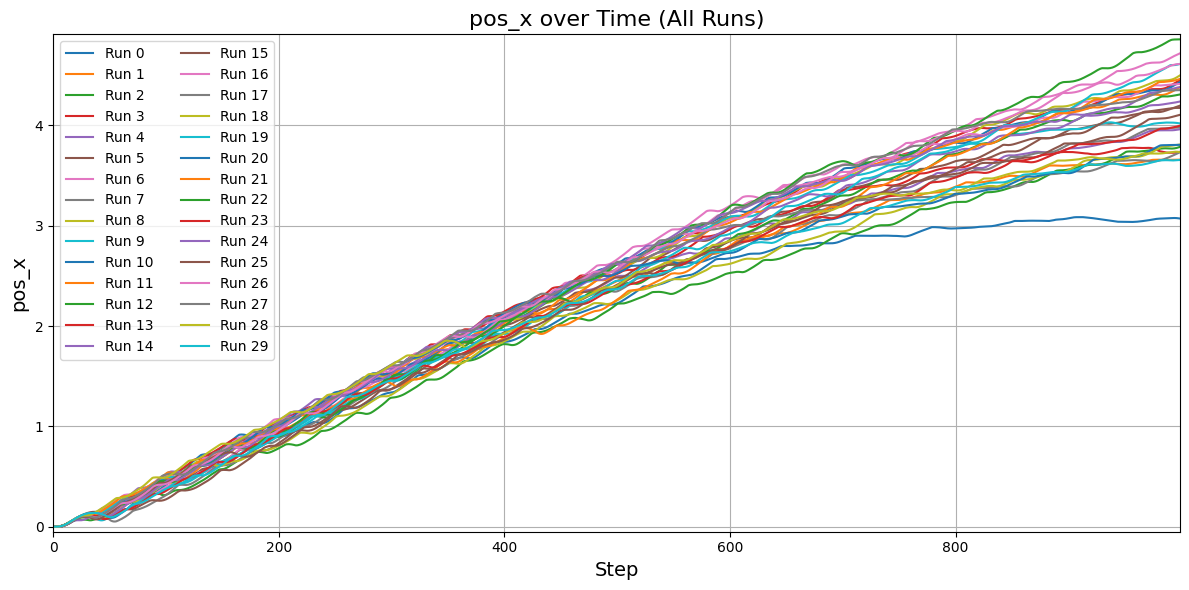

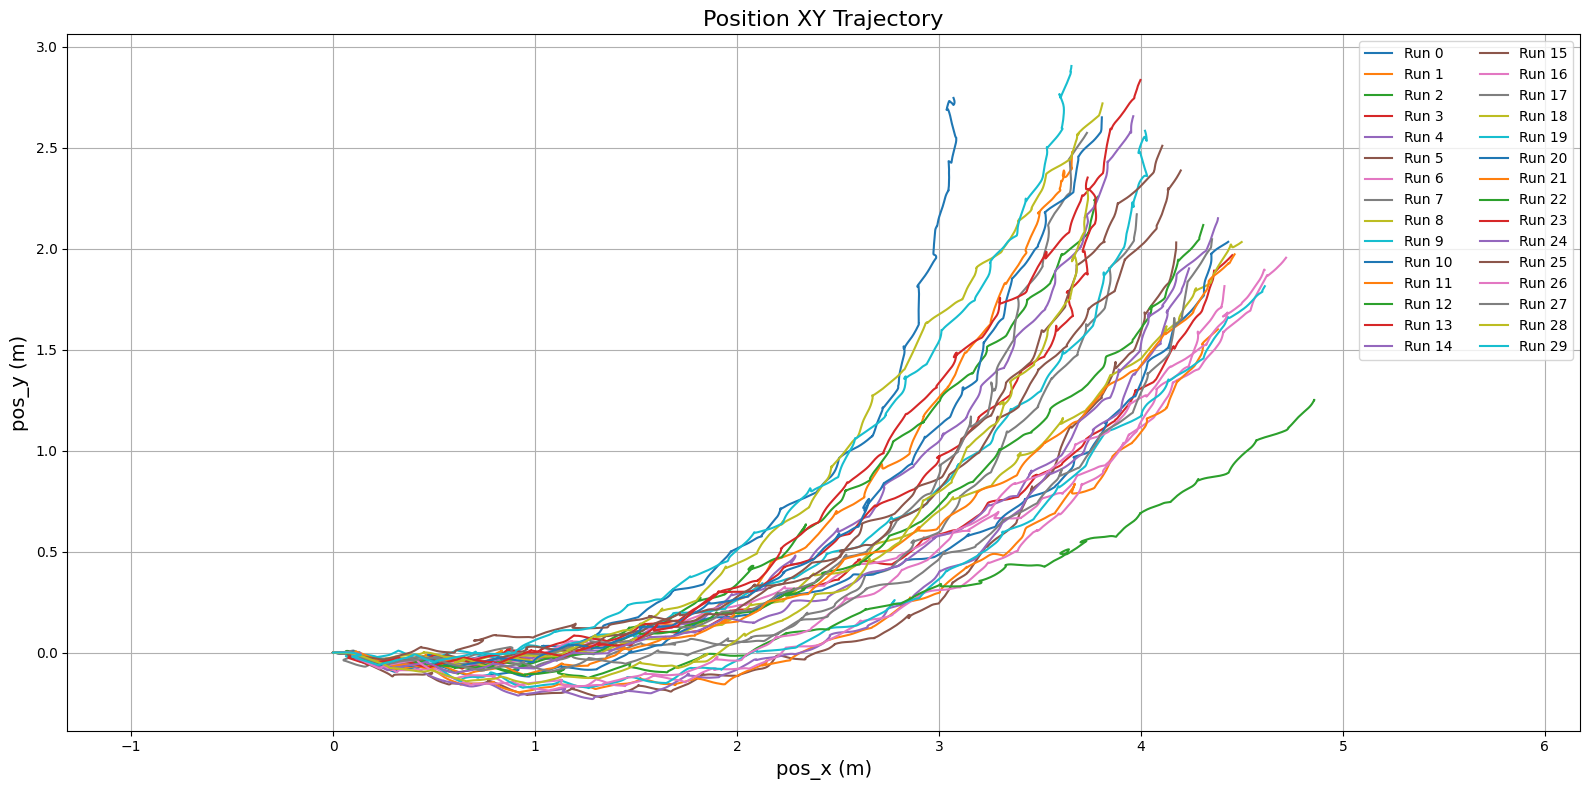

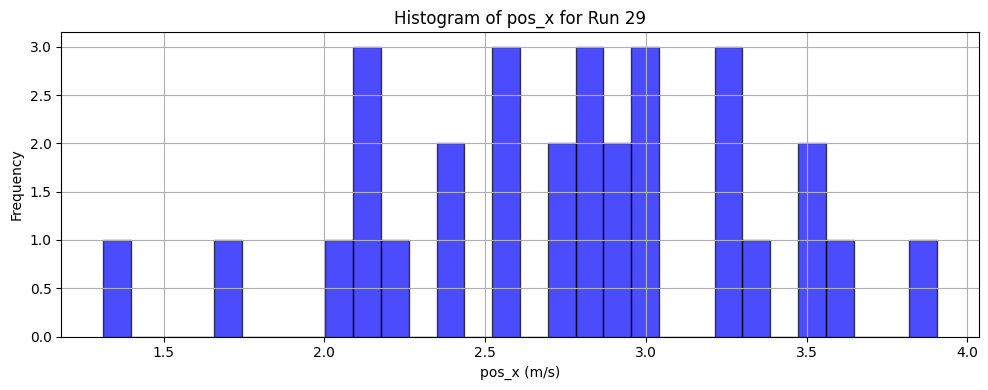

In [180]:
plot_pos_allrun(data_no_joint_vel, "pos_x", runs=30)
plot_posXY_allrun(data_no_joint_vel, "pos_x" ,"pos_y")
hist_max_pos_allrun(data_no_joint_pos, "pos_x")

### **No Action**

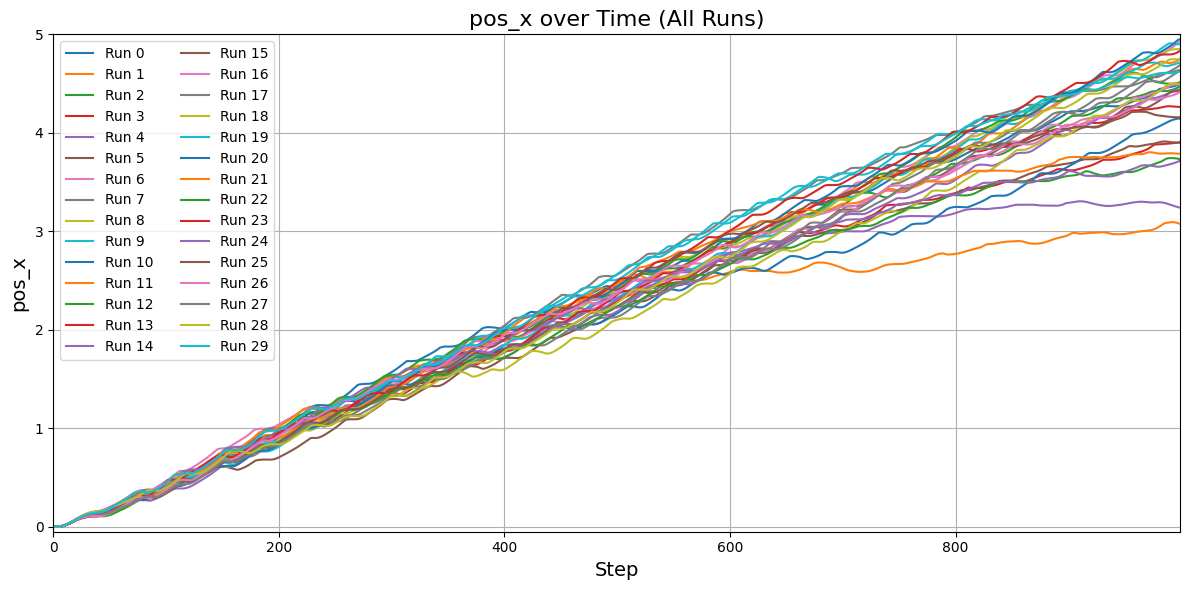

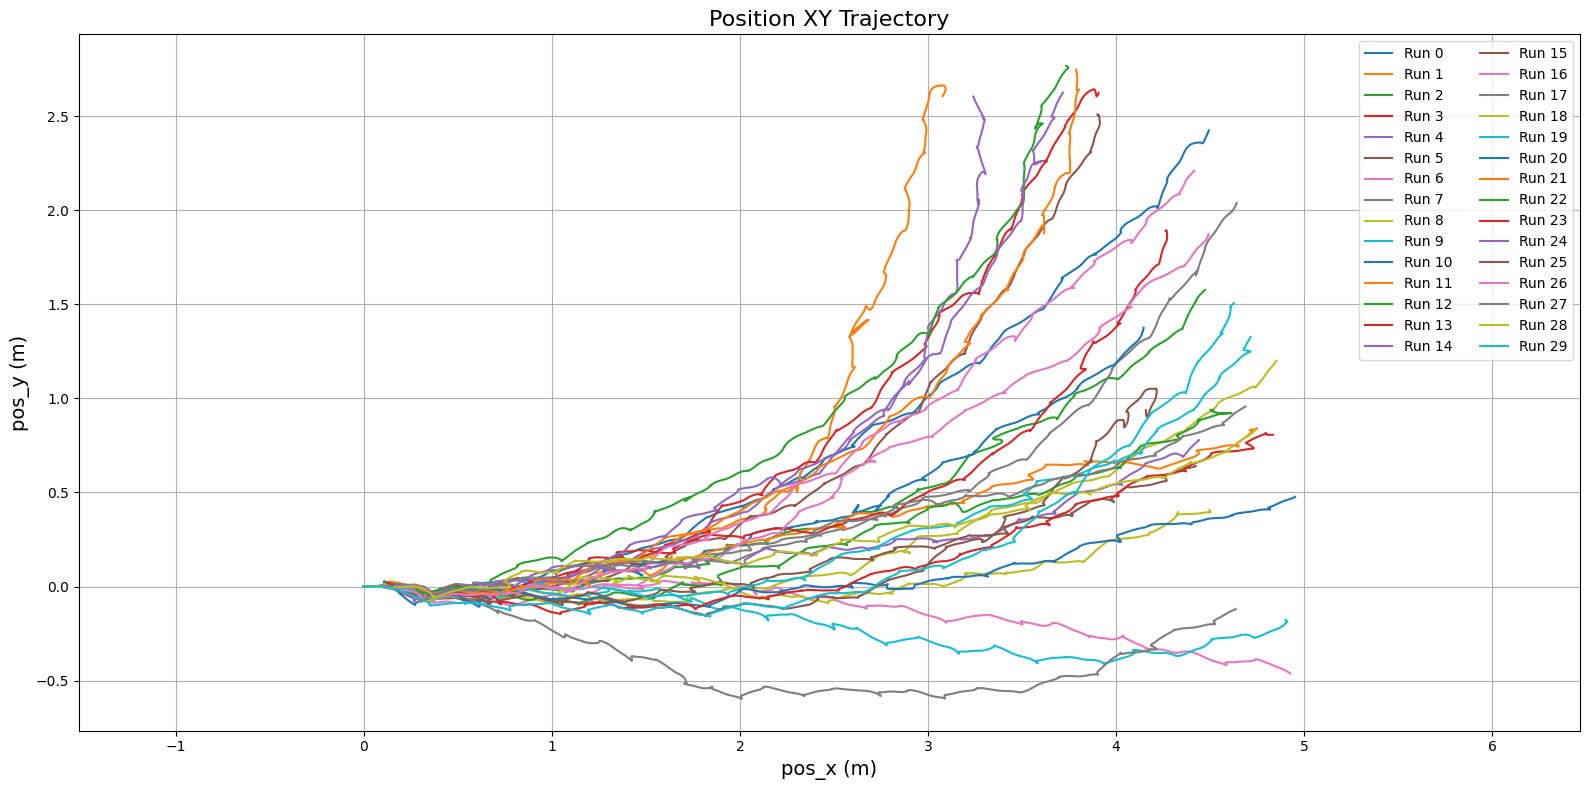

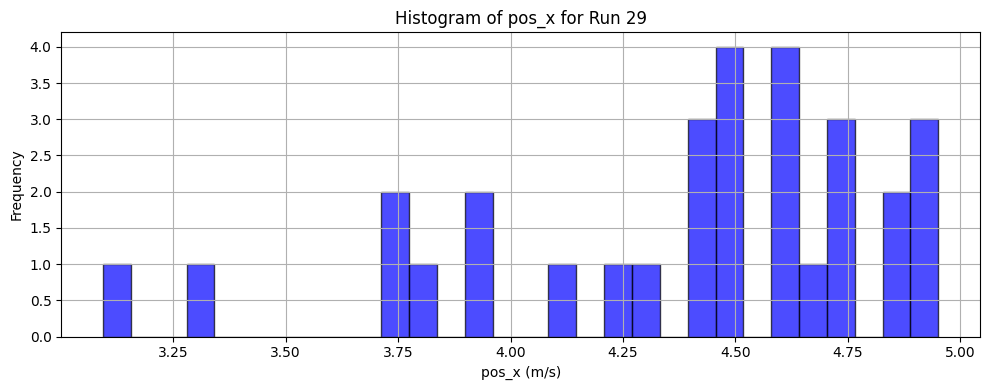

In [182]:
plot_pos_allrun(data_no_action, "pos_x", runs=30)
plot_posXY_allrun(data_no_action, "pos_x" ,"pos_y")
hist_max_pos_allrun(data_no_action, "pos_x")

### **No IMU**

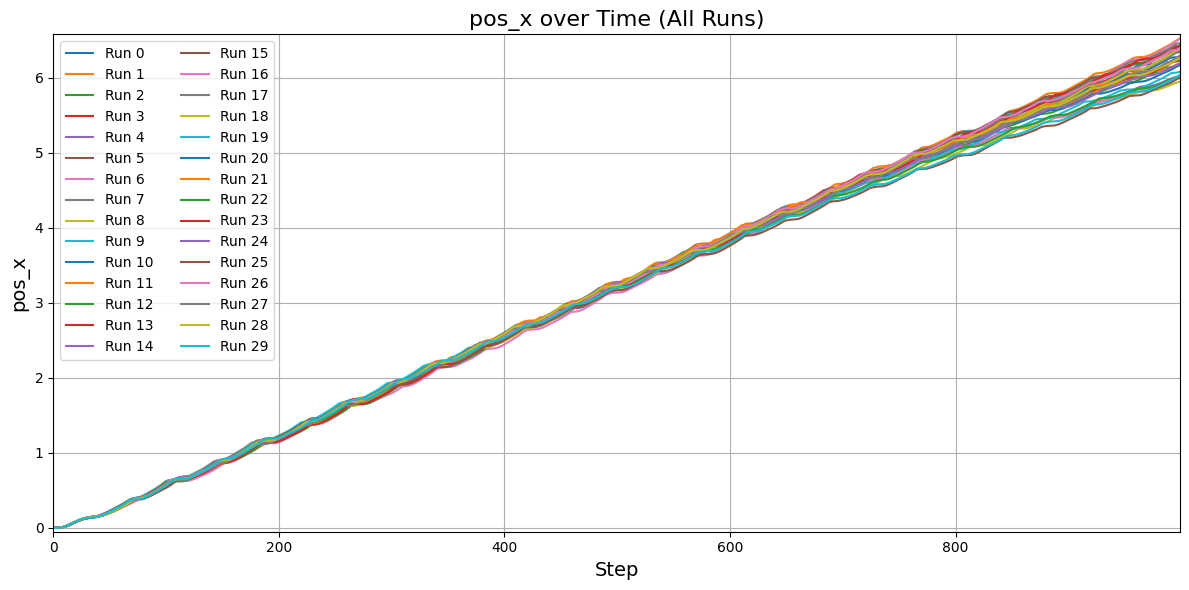

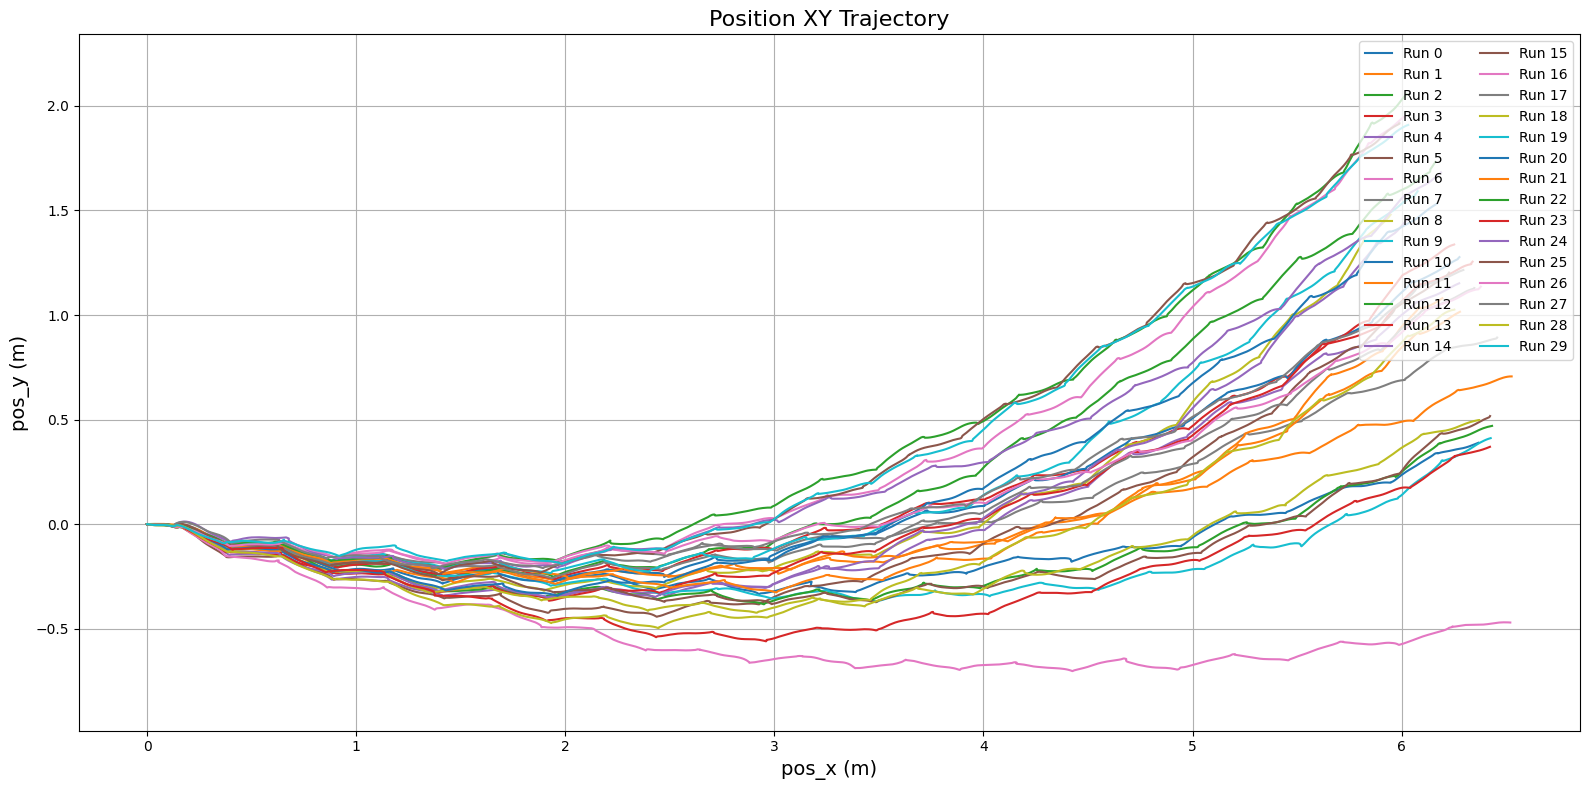

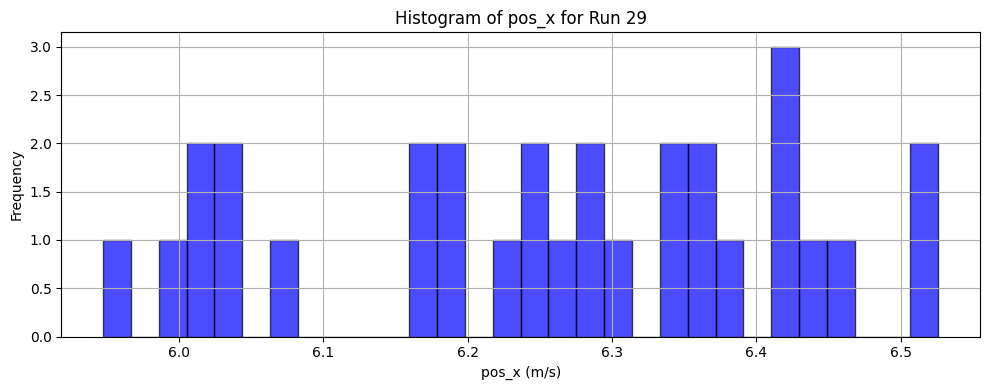

In [184]:
plot_pos_allrun(data_no_imu, "pos_x", runs=30)
plot_posXY_allrun(data_no_imu, "pos_x" ,"pos_y")
hist_max_pos_allrun(data_no_imu, "pos_x")

### **No FC**

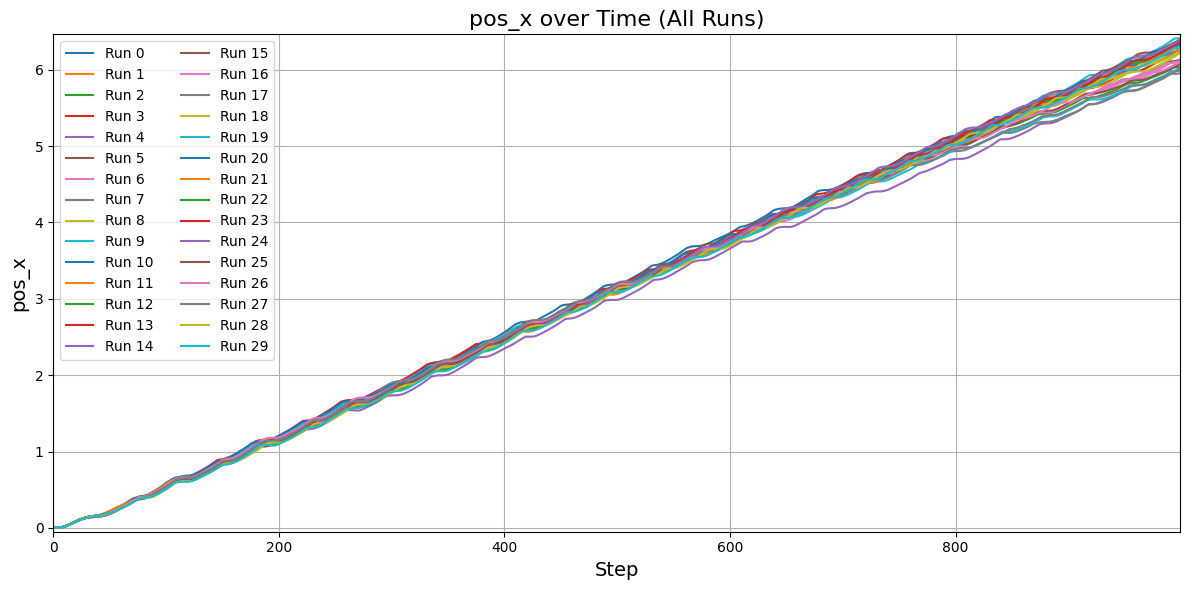

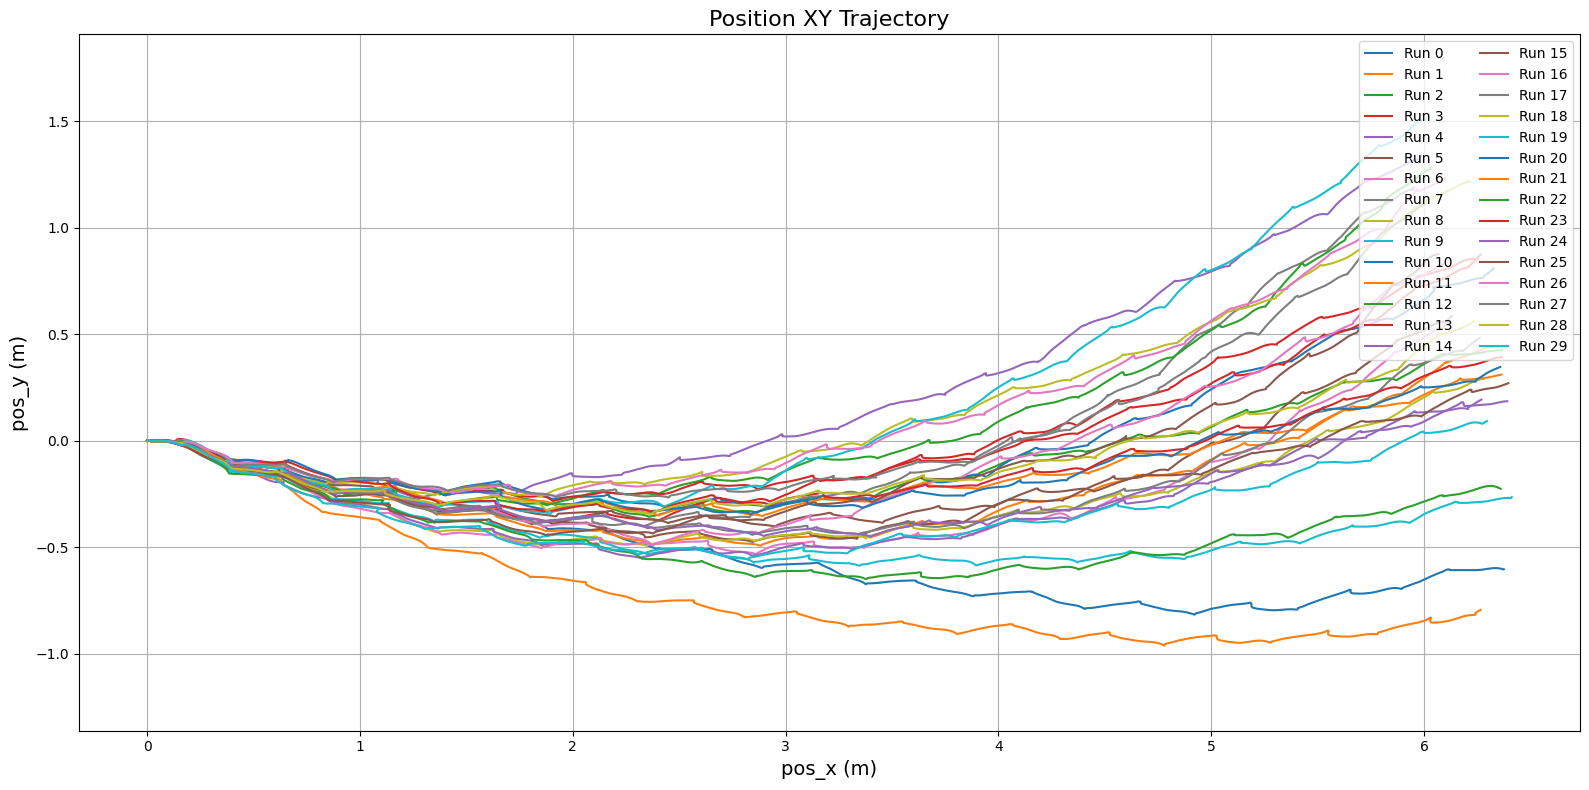

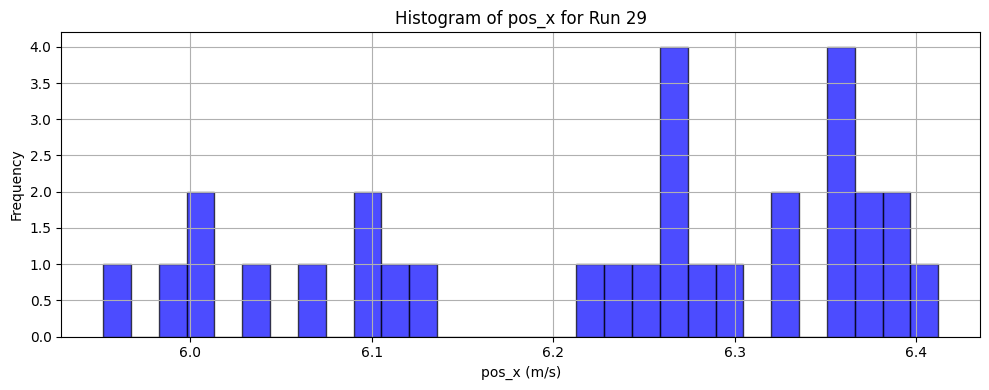

In [185]:
plot_pos_allrun(data_no_fc, "pos_x", runs=30)
plot_posXY_allrun(data_no_fc, "pos_x" ,"pos_y")
hist_max_pos_allrun(data_no_fc, "pos_x")

## **Plotting Overall performance**

In [190]:
fullstate_performance = np.max([np.squeeze(run["pos_x"]) for run in data_fullstate] , axis=1)
no_joint_pos_performance = np.max([np.squeeze(run["pos_x"]) for run in data_no_joint_pos] , axis=1)
no_joint_vel_performance = np.max([np.squeeze(run["pos_x"]) for run in data_no_joint_vel] , axis=1)
no_action_performance = np.max([np.squeeze(run["pos_x"]) for run in data_no_action] , axis=1)
no_imu_performance = np.max([np.squeeze(run["pos_x"]) for run in data_no_imu] , axis=1)
no_fc_performance = np.max([np.squeeze(run["pos_x"]) for run in data_no_fc] , axis=1)
bp_frame = [fullstate_performance, no_joint_pos_performance, no_joint_vel_performance, no_action_performance, no_imu_performance, no_fc_performance]

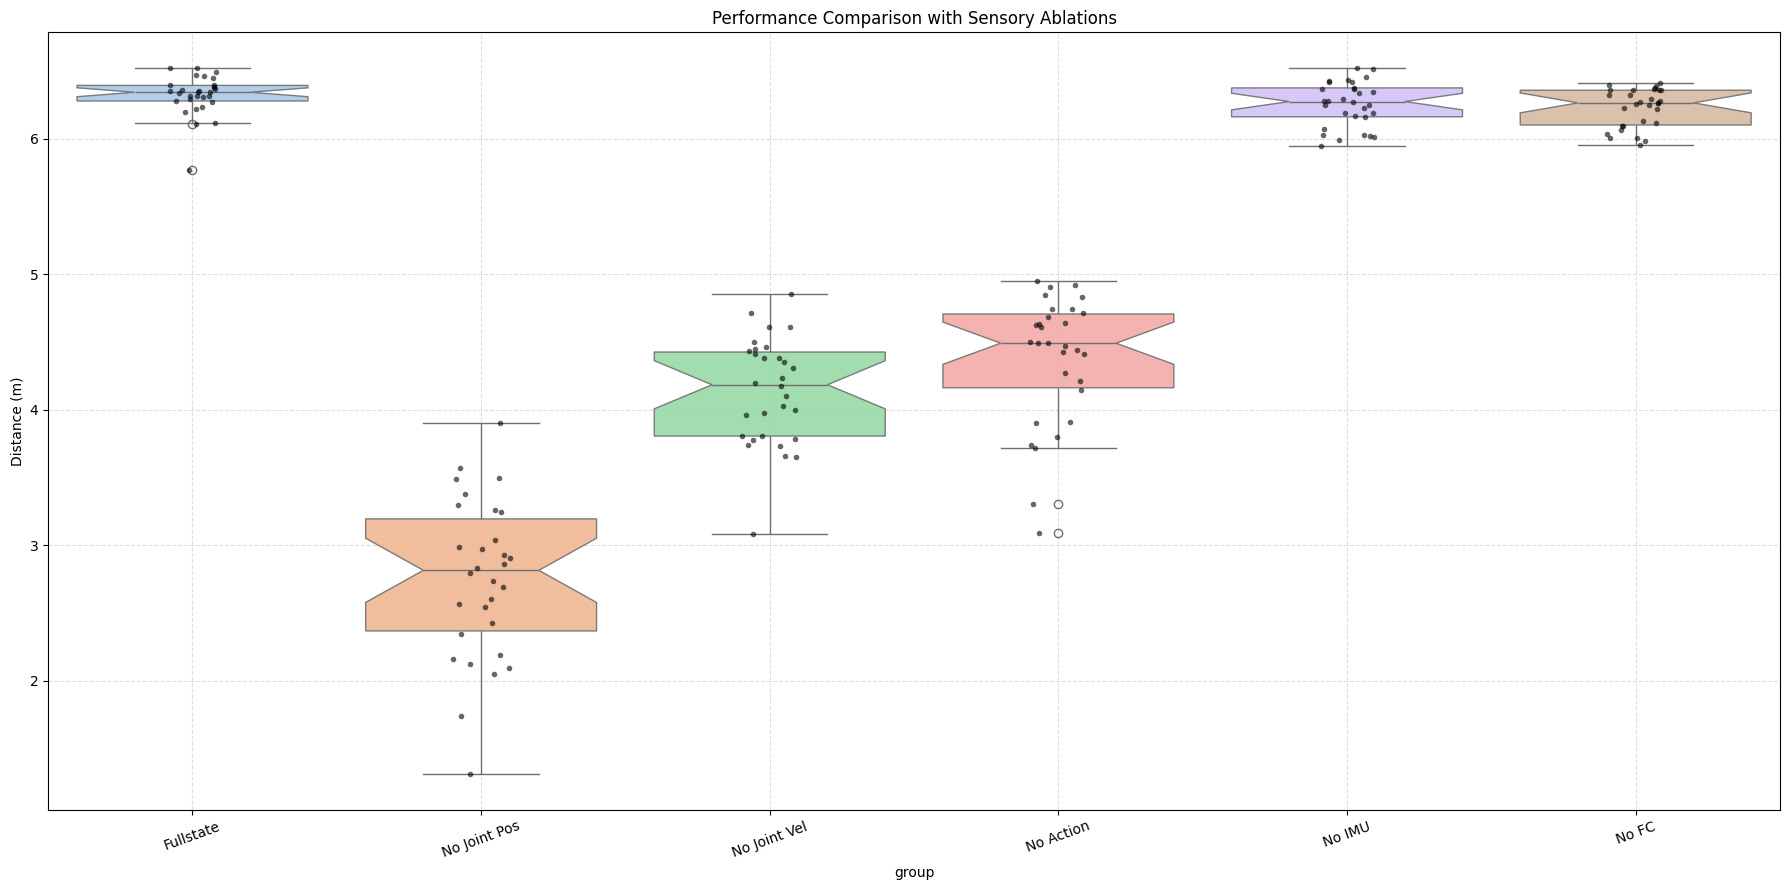

In [216]:
labels = ["Fullstate", "No Joint Pos", "No Joint Vel", "No Action", "No IMU", "No FC"]

# Convert to DataFrame
bp_long = pd.DataFrame({
    "value": np.concatenate(bp_frame),
    "group": np.concatenate([[label] * len(vals) for label, vals in zip(labels, bp_frame)])
})
plt.figure(figsize=(18, 9))

sns.boxplot(
    x="group", y="value", hue="group", data=bp_long,
    notch=True, palette="pastel", boxprops=dict(alpha=0.9), dodge=False
)
sns.stripplot(x="group", y="value", data=bp_long, color="black", alpha=0.6, size=4, jitter=True)

# remove duplicate legend from hue
plt.legend([], [], frameon=False)

plt.ylabel("Distance (m)")
plt.title("Performance Comparison with Sensory Ablations")
plt.xticks(rotation=20)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()